<a href="https://colab.research.google.com/github/aLL3H/projeto_netflix/blob/main/projeto_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skewnorm
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('netflix.csv')
df

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,(2022– ),TV-MA,45 min,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130"
9953,The Walking Dead,(2010–2022),TV-MA,44 min,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067"
9954,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898"
9955,Supernatural,(2005–2020),TV-14,44 min,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601"


In [ ]:
df.shape

(9957, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


In [ ]:
df.describe()

,rating
count,8784.000000
mean,6.764515
std,1.214840
min,1.700000
25%,6.100000
50%,6.900000
75%,7.600000
max,9.900000


In [ ]:
df.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


In [ ]:
df.tail()

,title,year,certificate,duration,genre,rating,description,stars,votes
9952,The Imperfects,(2022– ),TV-MA,45 min,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130"
9953,The Walking Dead,(2010–2022),TV-MA,44 min,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067"
9954,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898"
9955,Supernatural,(2005–2020),TV-14,44 min,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601"
9956,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,786"


In [ ]:
df.loc[(df['certificate']) == 'R']

,title,year,certificate,duration,genre,rating,description,stars,votes
11,End of the Road,(II) (2022),R,89 min,"Action, Crime, Drama",4.7,"In this high-octane action thriller, a cross-c...","['Millicent Shelton', '| ', ' Stars:', 'Que...","5,122"
32,Me Time,(2022),R,101 min,Comedy,5.0,Follows a dad who finds time for himself for t...,"['John Hamburg', '| ', ' Stars:', 'Kevin Ha...","26,092"
53,Day Shift,(2022),R,113 min,"Action, Comedy, Fantasy",6.1,"A hard-working, blue-collar dad just wants to ...","['J.J. Perry', '| ', ' Stars:', 'Jamie Foxx...","62,931"
79,All Quiet on the Western Front,(2022),R,147 min,"Action, Drama, War",8.3,A young German soldier's terrifying experience...,"['Edward Berger', '| ', ' Stars:', 'Daniel ...",199
81,American Psycho,(2000),R,102 min,"Crime, Drama, Horror",7.6,A wealthy New York City investment banking exe...,"['Mary Harron', '| ', ' Stars:', 'Christian...","598,117"
...,...,...,...,...,...,...,...,...,...
7632,Southern Justice,(2006),R,96 min,"Action, Adventure, Thriller",3.1,"M.D. Selig's feature thriller, SOUTHERN JUSTIC...","['M.D. Selig', '| ', ' Stars:', 'M.D. Selig...",131
7674,Meeting a Bullet,(2004 Video),R,75 min,Crime,3.7,A dirty cop accuses a young individual of a st...,"['Douglas Elford-Argent', '| ', ' Stars:', ...",115
8017,A Tiger in the Dark: The Decadence Saga,(2014 Video),R,128 min,"Drama, Fantasy, Sci-Fi",7.7,They have only one purpose...to find you.,"['Drew Glick', '| ', ' Stars:', 'Tod Boulwa...",50
9931,Me Time,(2022),R,101 min,Comedy,5.0,Follows a dad who finds time for himself for t...,"['John Hamburg', '| ', ' Stars:', 'Kevin Ha...","26,101"


In [ ]:
df.sort_values("rating")

,title,year,certificate,duration,genre,rating,description,stars,votes
6633,Defcon 2012,(2010),Not Rated,92 min,Sci-Fi,1.7,"On October 30, 2009 an independent filmmaker a...","['R. Christian Anderson', '| ', ' Stars:', ...",407
6033,Hajwala: The Missing Engine,(2016),PG-13,96 min,"Action, Adventure, Crime",2.0,Khalid and Kehailan are two team leaders who a...,"['Ali Bin Matar, ', 'Ibrahim Bin Mohamed, ', '...",261
4987,Way of the Vampire,(2005),R,82 min,"Action, Horror, Thriller",2.0,"After defeating Dracula, Van Helsing is grante...","['Sarah Nean Bruce, ', 'Eduardo Durão', '| ', ...","1,649"
3612,The Hype House,(2022– ),TV-MA,36 min,Reality-TV,2.1,Get an inside look at social media's least tal...,"['Larray, ', 'Alex Warren, ', 'Kouvr Annon, ',...","2,955"
3357,Thomas & Friends: All Engines Go,(2021– ),TV-Y,30 min,"Animation, Short, Adventure",2.1,"All aboard, everyone. It's all engines go as T...","['Ava Ro, ', 'Charlie Zeltzer, ', 'Glee Dango,...",604
...,...,...,...,...,...,...,...,...,...
9752,Hey Duggee,(2014– ),TV-Y,8 min,"Animation, Comedy, Family",NaN,Duggee and the Squirrels bake a pie and learn ...,['Adam Longworth'],NaN
9802,Hey Duggee,(2014– ),TV-Y,8 min,"Animation, Comedy, Family",NaN,Duggee arranges for the Squirrels to write to ...,"['Adam Longworth, ', 'Lily-Summer Williams']",NaN
9813,Oni: Thunder God's Tale,(2022– ),TV-Y7,NaN,"Animation, Action, Adventure",NaN,Add a Plot,"[""Daisuke 'Dice' Tsutsumi"", '| ', ' Stars:'...",NaN
9842,Hollywood Insider,(2018– ),NaN,NaN,Talk-Show,NaN,Behind the scenes of The Irishman.,"['Bobby Cannavale, ', 'Robert De Niro, ', 'Al ...",NaN


In [ ]:
df.sort_values("rating", ascending = False)

,title,year,certificate,duration,genre,rating,description,stars,votes
9444,BoJack Horseman,(2014–2020),TV-MA,26 min,"Animation, Comedy, Drama",9.9,BoJack reconnects with faces from his past.,"['Amy Winfrey', '| ', ' Stars:', 'Will Arne...","16,066"
9578,Stranger Things,(2016– ),TV-14,98 min,"Drama, Fantasy, Horror",9.6,"As Hopper braces to battle a monster, Dustin d...","['Matt Duffer, ', 'Ross Duffer', '| ', ' St...","36,276"
8161,Avatar: The Last Airbender,(2005–2008),TV-Y7,25 min,"Animation, Action, Adventure",9.6,The heroes work together to stop Azula's destr...,"['Michael Dante DiMartino', '| ', ' Stars:'...","5,221"
17,1899,(2022– ),NaN,60 min,"Drama, History, Horror",9.6,Multinational immigrants traveling from the ol...,"['Ben Ashenden, ', 'Aneurin Barnard, ', 'Emily...",853
8259,Dexter,(2006–2013),TV-MA,56 min,"Crime, Drama, Mystery",9.6,"In the Season One finale, Dexter follows the c...","['Michael Cuesta', '| ', ' Stars:', 'Michae...","10,604"
...,...,...,...,...,...,...,...,...,...
9752,Hey Duggee,(2014– ),TV-Y,8 min,"Animation, Comedy, Family",NaN,Duggee and the Squirrels bake a pie and learn ...,['Adam Longworth'],NaN
9802,Hey Duggee,(2014– ),TV-Y,8 min,"Animation, Comedy, Family",NaN,Duggee arranges for the Squirrels to write to ...,"['Adam Longworth, ', 'Lily-Summer Williams']",NaN
9813,Oni: Thunder God's Tale,(2022– ),TV-Y7,NaN,"Animation, Action, Adventure",NaN,Add a Plot,"[""Daisuke 'Dice' Tsutsumi"", '| ', ' Stars:'...",NaN
9842,Hollywood Insider,(2018– ),NaN,NaN,Talk-Show,NaN,Behind the scenes of The Irishman.,"['Bobby Cannavale, ', 'Robert De Niro, ', 'Al ...",NaN


In [ ]:
# top 10 séries/filmes mais bem avaliadas
top_10 = df.sort_values("rating", ascending = False).head(10)
top_10

,title,year,certificate,duration,genre,rating,description,stars,votes
9444,BoJack Horseman,(2014–2020),TV-MA,26 min,"Animation, Comedy, Drama",9.9,BoJack reconnects with faces from his past.,"['Amy Winfrey', '| ', ' Stars:', 'Will Arne...","16,066"
9578,Stranger Things,(2016– ),TV-14,98 min,"Drama, Fantasy, Horror",9.6,"As Hopper braces to battle a monster, Dustin d...","['Matt Duffer, ', 'Ross Duffer', '| ', ' St...","36,276"
8161,Avatar: The Last Airbender,(2005–2008),TV-Y7,25 min,"Animation, Action, Adventure",9.6,The heroes work together to stop Azula's destr...,"['Michael Dante DiMartino', '| ', ' Stars:'...","5,221"
17,1899,(2022– ),NaN,60 min,"Drama, History, Horror",9.6,Multinational immigrants traveling from the ol...,"['Ben Ashenden, ', 'Aneurin Barnard, ', 'Emily...",853
8259,Dexter,(2006–2013),TV-MA,56 min,"Crime, Drama, Mystery",9.6,"In the Season One finale, Dexter follows the c...","['Michael Cuesta', '| ', ' Stars:', 'Michae...","10,604"
8557,JoJo's Bizarre Adventure,(2012– ),TV-MA,25 min,"Animation, Action, Adventure",9.6,In the aftermath of the battle between Risotto...,"['Shinshû Fuji, ', 'Kellen Goff, ', 'Katsuyuki...","1,442"
8907,Avatar: The Last Airbender,(2005–2008),TV-Y7,24 min,"Animation, Action, Adventure",9.6,As the Fire Nation continues its assault on th...,"['Dave Filoni', '| ', ' Stars:', 'Zach Tyle...","3,953"
8044,Avatar: The Last Airbender,(2005–2008),TV-Y7,25 min,"Animation, Action, Adventure",9.5,As Zuko tries to make it by in exile without h...,"['Lauren MacMullan', '| ', ' Stars:', 'Dant...","5,383"
9445,BoJack Horseman,(2014–2020),TV-MA,27 min,"Animation, Comedy, Drama",9.5,A celebration brings people together.,"['Aaron Long', '| ', ' Stars:', 'Will Arnet...","6,230"
9586,Avatar: The Last Airbender,(2005–2008),TV-Y7,25 min,"Animation, Action, Adventure",9.5,Both Aang and Zuko must learn the history of h...,"['Ethan Spaulding', '| ', ' Stars:', 'Zach ...","4,740"


In [ ]:
top_10["title"].value_counts()

Avatar: The Last Airbender    4
BoJack Horseman               2
Stranger Things               1
1899                          1
Dexter                        1
JoJo's Bizarre Adventure      1
Name: title, dtype: int64

In [ ]:
top_10["genre"].value_counts()

Animation, Action, Adventure    5
Animation, Comedy, Drama        2
Drama, Fantasy, Horror          1
Drama, History, Horror          1
Crime, Drama, Mystery           1
Name: genre, dtype: int64

<BarContainer object of 10 artists>

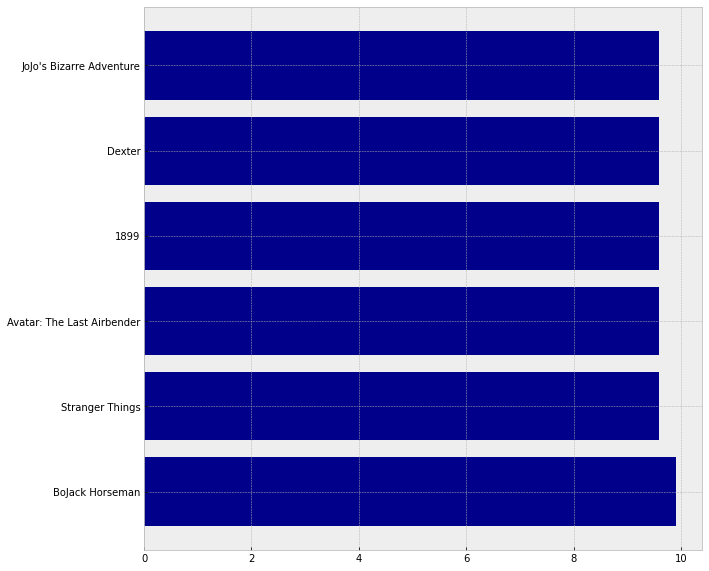

In [ ]:
plt.style.use("bmh")
plt.figure(figsize=(10,10))
plt.barh(top_10["title"],top_10["rating"],color="darkblue")

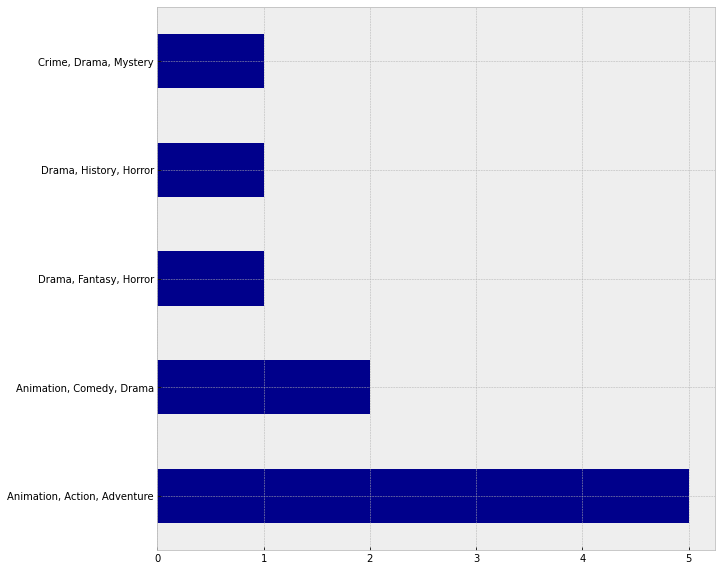

In [ ]:
top_10["genre"].value_counts().plot(kind="barh",color="darkblue",figsize=(10,10))

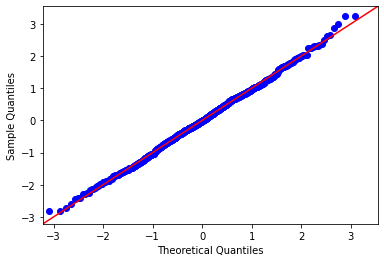

In [ ]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab
df = norm.rvs(size=1000)
sm.qqplot(df, line='45')
pylab.show()

In [ ]:
stats.shapiro(df)

ShapiroResult(statistic=0.9984158873558044, pvalue=0.5008917450904846)